In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Univariate Analysis**

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


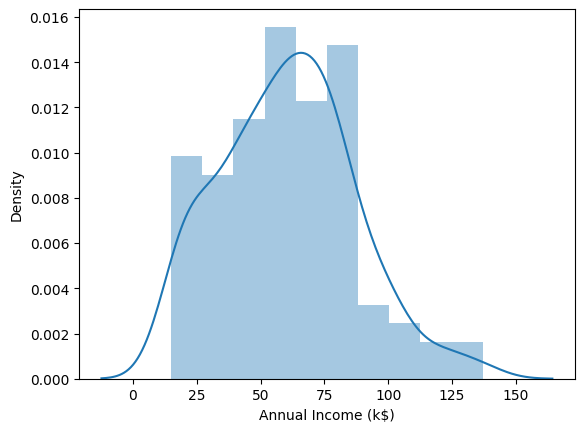

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

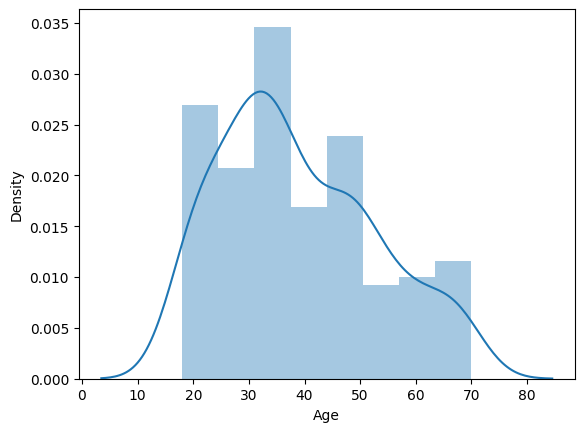

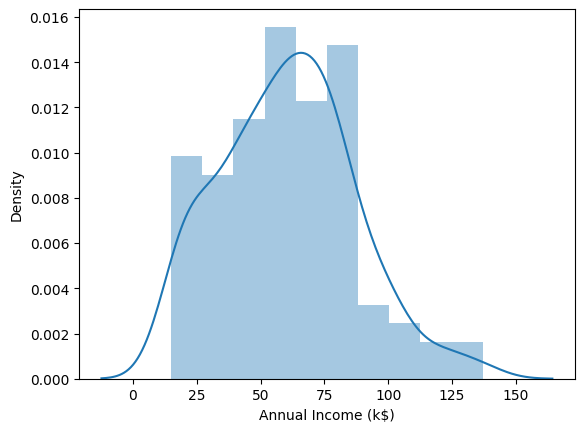

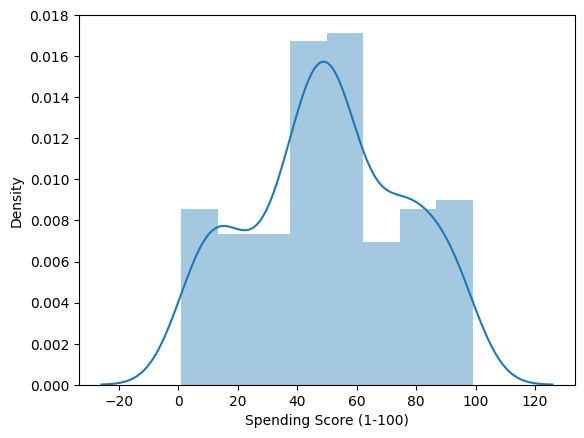

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

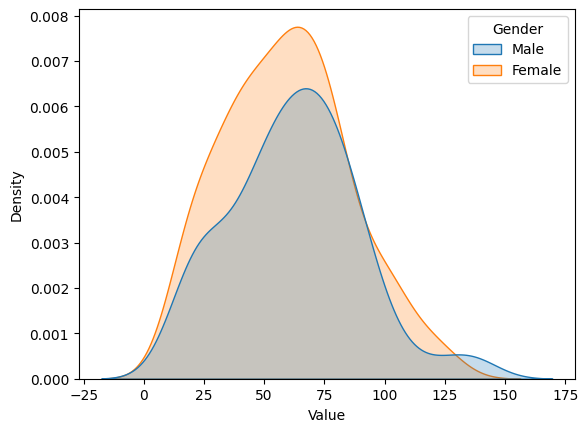

In [8]:
# Melt the dataframe to convert it into long-form.
df_melted = df.melt(id_vars=['Gender'], value_vars=['Annual Income (k$)'], var_name='Variable', value_name='Value')

# Now you can use the hue parameter with the melted dataframe.
sns.kdeplot(x='Value', hue='Gender', data=df_melted, shade=True);

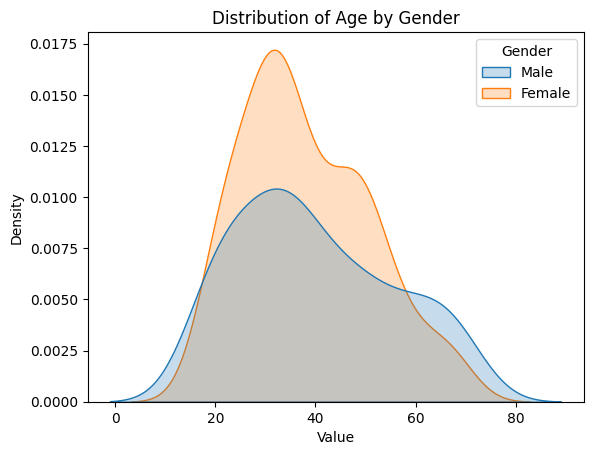

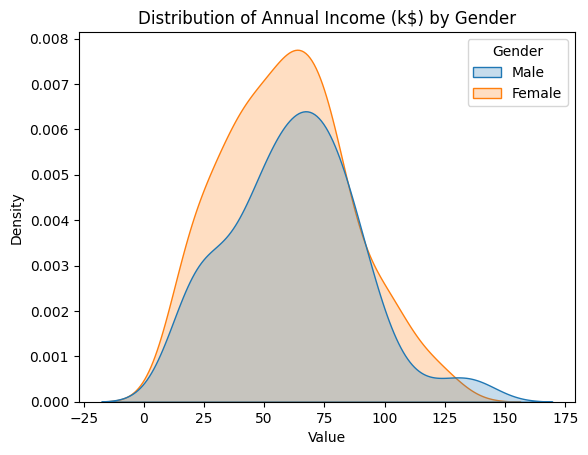

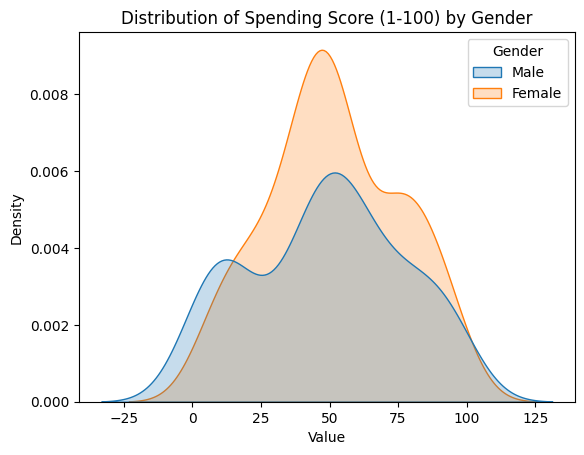

In [9]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    # Melt the data to create a long-form DataFrame for the current column
    melted_data = df.melt(id_vars=['Gender'], value_vars=[i], var_name='Variable', value_name='Value')
    # Now use the melted data with sns.kdeplot, specifying the x, hue, and data parameters
    sns.kdeplot(x='Value', hue='Gender', data=melted_data, shade=True)
    plt.title(f'Distribution of {i} by Gender')
    plt.show()

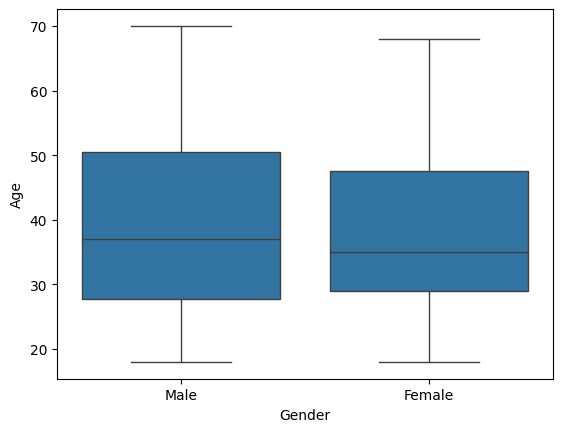

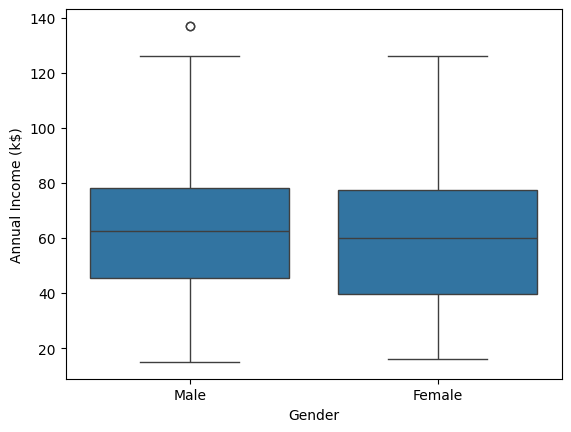

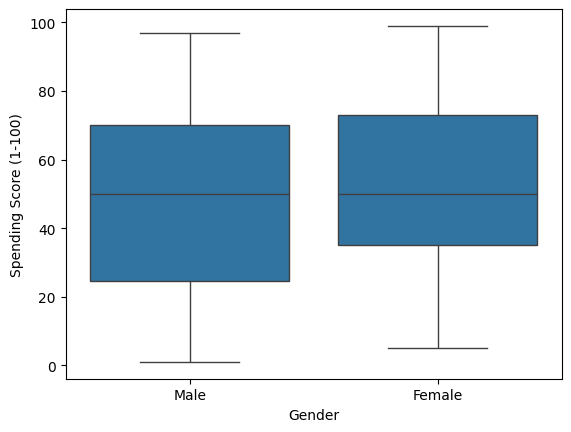

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [11]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


**Bivariate Analysis**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

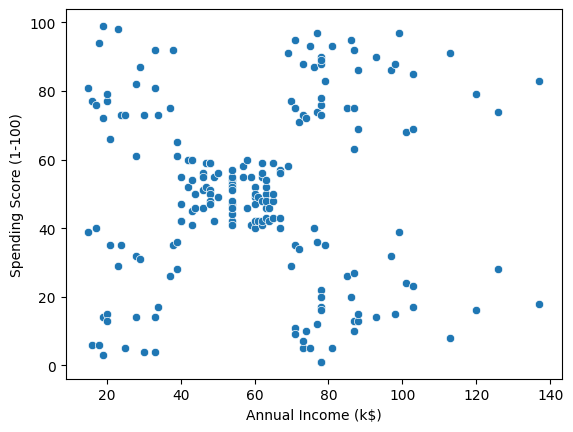

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

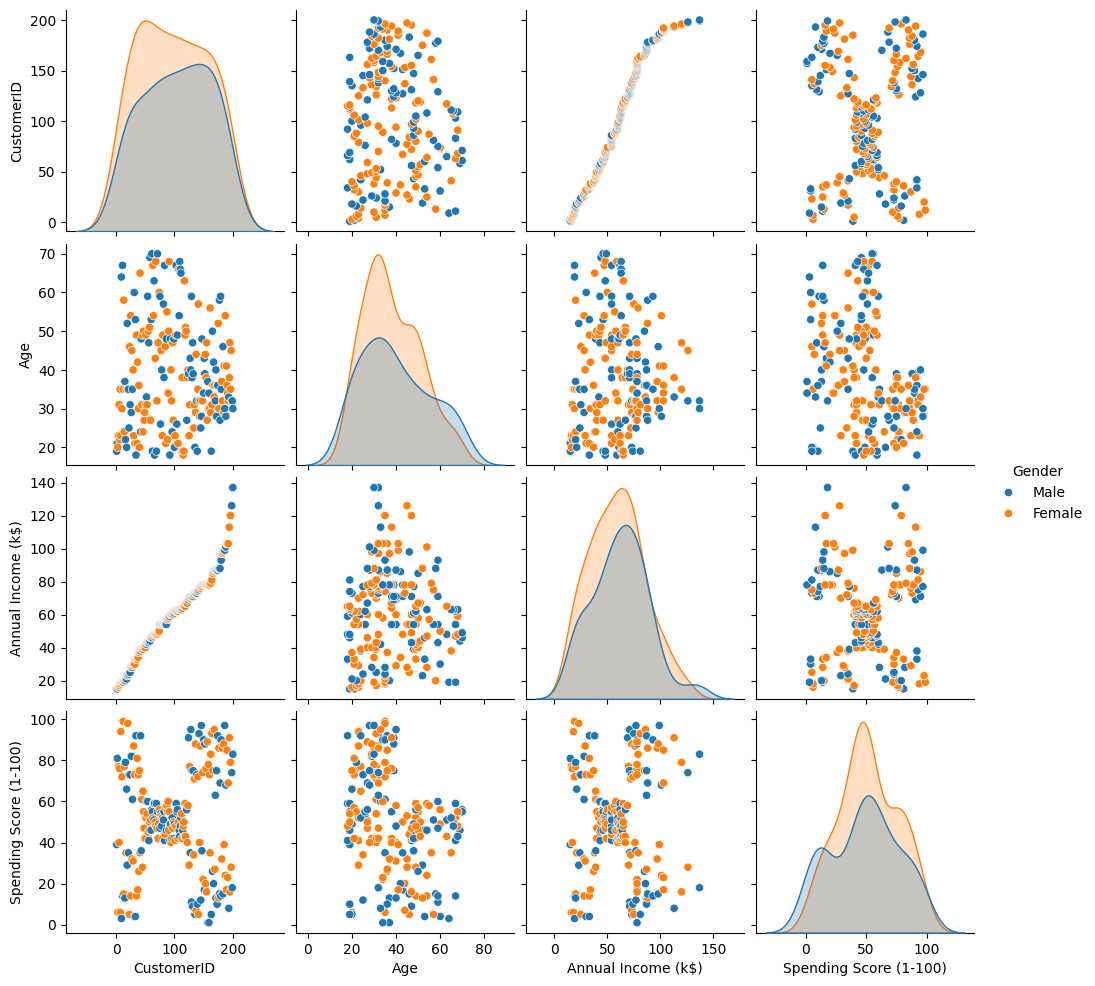

In [13]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [14]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
# Changed the tuple of columns to a list by enclosing it in an additional pair of square brackets

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
# Convert 'Gender' column to numerical representation using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Calculate the correlation matrix on the encoded DataFrame
df_encoded.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.058109
Gender_Male,0.057400,0.060867,0.056410,-0.058109,1.000000


<Axes: >

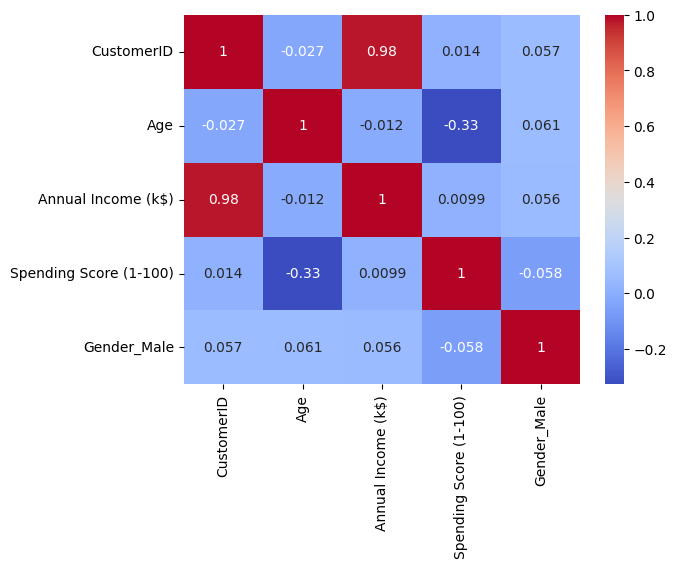

In [16]:
# Convert 'Gender' column to numerical representation using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Calculate the correlation matrix on the encoded DataFrame
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm')

**Clustering - Univariate, Bivariate, Multivariate**

In [27]:
clustering1 = KMeans(n_clusters=3)

In [28]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [29]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [30]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [31]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
1,104
0,74
2,22


In [32]:
clustering1.inertia_

24361.259213759215

In [33]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [34]:
intertia_scores

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13844.22209821871,
 8688.388977879482,
 5468.858011695908,
 4062.954545454544,
 2897.7750305250297,
 2325.560497835499,
 1895.848984348985]

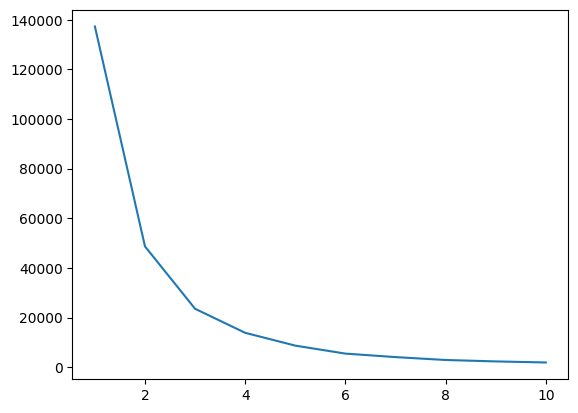

In [35]:
plt.plot(range(1,11),intertia_scores)

In [37]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [39]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
# Changed the tuple of columns to a list by enclosing them in square brackets []

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.663462,69.750000,49.798077
2,37.545455,108.181818,52.000000


**Bivariate Clustering**

In [40]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,0


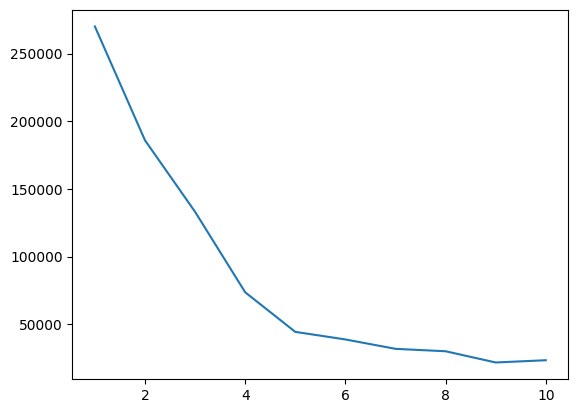

In [41]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [42]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

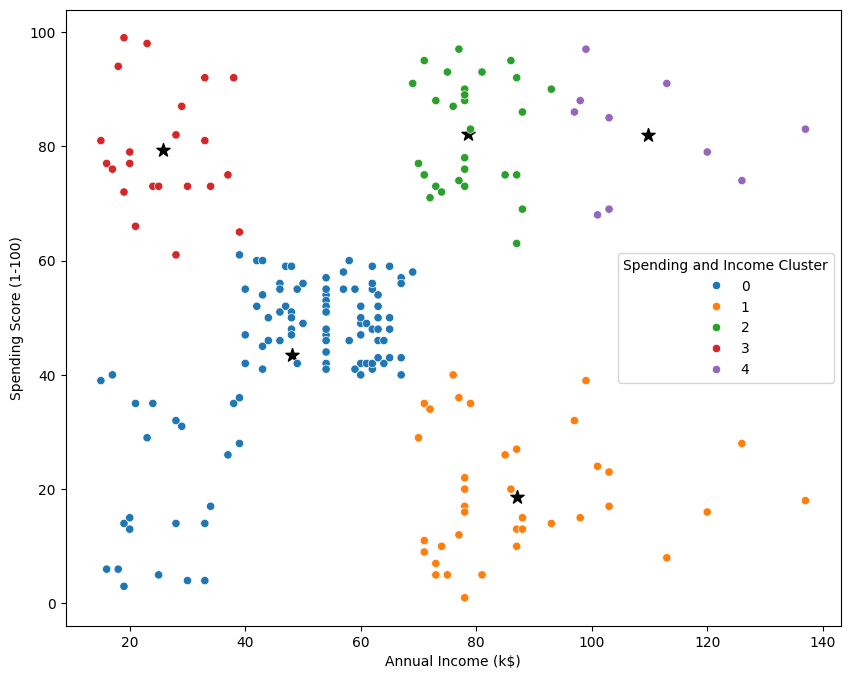

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [44]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.594059,0.405941
1,0.473684,0.526316
2,0.517241,0.482759
3,0.590909,0.409091
4,0.600000,0.400000


In [46]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,43.603960,48.168317,43.396040
1,40.394737,87.000000,18.631579
2,32.862069,78.551724,82.172414
3,25.272727,25.727273,79.363636
4,32.200000,109.700000,82.000000


**mulivariate clustering**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scale = StandardScaler()

In [49]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,0


In [50]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,0,True
1,2,21,15,81,0,3,True
2,3,20,16,6,0,0,False
3,4,23,16,77,0,3,False
4,5,31,17,40,0,0,False


In [51]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [52]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [53]:
dff = scale.fit_transform(dff)

In [54]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


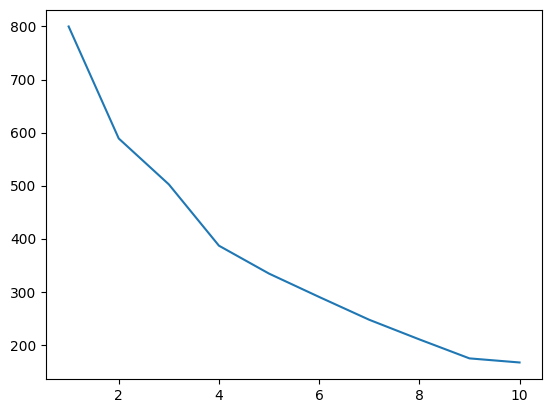

In [55]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [56]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,4
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,2,4
198,199,Male,32,137,18,2,1


In [57]:
df.to_csv('Clustering.csv')